In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from d3s.d3s.networks import tgraph
from mtrower.Code.time_evolving_functions import evolving_ladder, evolving_eigs

In [3]:
np.random.seed(3)

## Simple evolving ladder

In [4]:
# snapshots to get adjacency matrix at
times = np.arange(10)
# edges with weight epsilon
edges = [(0, 4), (4, 0), (1, 5), (5, 1), (2, 6), (6, 2), (3, 7), (7, 3)]
# get snapshots
As, eps = evolving_ladder(2, 4, times, edges)

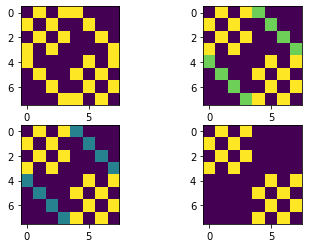

In [5]:
# plot the adjacency matrices at certain time points
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].imshow(As[:,:,0])
axs[0,1].imshow(As[:,:,2])
axs[1,0].imshow(As[:,:,5])
axs[1,1].imshow(As[:,:,9])

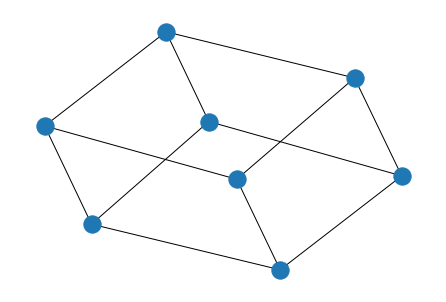

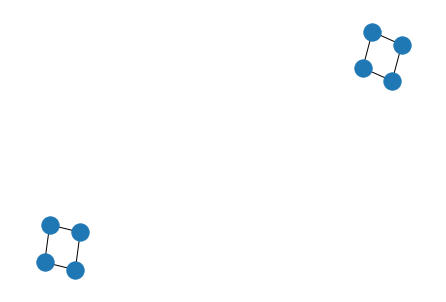

In [6]:
# show graph at start and end
g1 = nx.Graph(As[:,:,0])
g2 = nx.Graph(As[:,:,2])
g3 = nx.Graph(As[:,:,5])
g4 = nx.Graph(As[:,:,-1])

nx.draw(g1)
plt.show()
nx.draw(g4)
plt.show()

/home/s2113337/PycharmProjects/ForwardBackwardLaplacian/mtrower/Code/time_evolving_functions.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  evs_array[:, i] = d


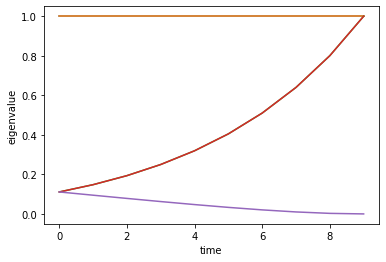

In [11]:
# plot eigenvalues over time
eigs = evolving_eigs(As, evs=5, which="LM")

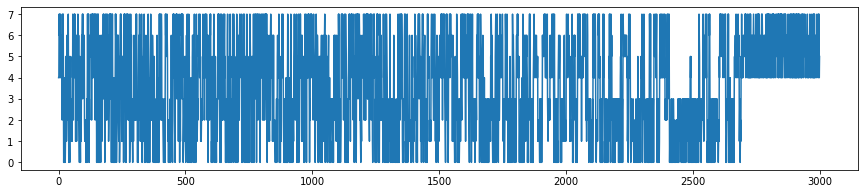

In [12]:
# random walk as graph is evolving

tg = tgraph(As)
# initial condition
x0 = np.random.randint(tg.n)
twalk = tg.randomWalk(x0, s=300)

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(twalk)